# Relación de grado promedio de escolaridad y número de viviendas con internet en Guadalajara, Jalisco, México

En éste ejercicio, veremos la relación que obtiene el grado de escolaridad promedio de la colonia y el número de viviendas que cuentan con internet. Siendo nuestra <b>variable independiente poblacion economicamente activa <i>(PEA)</i></b>, y la <b>variable dependiente viviendas particulares habitadas que disponen de internet <i>(VPDHI)</i>.</b>

&emsp;Estos datos fueron recuperados de la página datos.jalisco.gob.mx, obtenidos por el <b><i>Institulo Informativo de Estadística Geografía del Estado de Jalisco </i>(IIEG)</b>, representativos del año 2010.

### Librerias utilizadas

Para este ejercicio se implementará la libreria <b>Pandas</b>, para el análisis de datos, <b>Numpy</b>, para en análisis estadístico del grado de escolaridad promedio y número de viviendas con internet, <b>Matplotlib</b>, para la representación gráfica de los mismos, y <b>Stats de scipy</b> para crear el modelo de regresión lineal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Utilización de datos

A continuación se tomará el archivo csv con el nombre <i>viviendas_con_internet.csv</i> a través de pandas en una variable que se nombrará <b><i>data</i></b>.

In [2]:
data = pd.read_csv("viviendas_con_internet.csv")

A continuación se utilizará el método <b>head</b> de la librería pandas para comprobar que nuestra información dentro de la variable <b><i>data</i></b> sea la correcta.

In [3]:
data.head(5)

,Municipio,Colonia,poblacion_economicamente_activa,viviendas_particulares_habitadas_que_disponen_de_internet
0,Guadalajara,COMERCIAL ABASTOS,0,0
1,Guadalajara,FERROVEJEROS,0,0
2,Guadalajara,FLAMINGOS,0,0
3,Guadalajara,LAS ARBOLEDAS,0,0
4,Guadalajara,PARQUE AGUA AZUL,0,0


Si bien nos demuestra los campos de PEA y VPHDI como vacios, se puede observar que las colonias van en el órden de acuerdo con el documento <b><i>CSV</i></b> que se tiene.

En este paso se tomarán las dos variables <b>poblacion economicamente activa<i> (PEA)</i></b> y <b>viviendas particulares habitadas que disponen de internet<i> (VPHDI)</i></b>, las cuales las llamaremos <i><b>x</b></i> y <i><b>y</b></i> respectivamente. También se implementará la librería <b><i>matplotlib</i></b> para graficar los datos entre ambas variables.

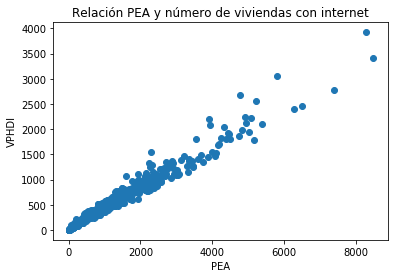

In [4]:
y = np.array(data['viviendas_particulares_habitadas_que_disponen_de_internet'], int)
x = np.array(data['poblacion_economicamente_activa'], int)
plt.scatter(x, y)
plt.title('Relación PEA y número de viviendas con internet')
plt.xlabel('PEA')
plt.ylabel('VPHDI')
plt.show()

Con el gráfico se puede observar que tienen una fuerte correlación ambas variables. Por lo cuál se emplearán a continuación métodos estadísticos para su mejor evaluación.

### Coeficientes estadísticos

Para empezar se sacará el <b>promedio</b> de cada una de las variables junto con su <b>desviación estándar</b>. Todo esto se sacará con el método <b><i>mean</i></b> de la librería <b><i>numpy</i></b>, para sacar el promedio, y el método  <b><i>std</i></b> de la misma libreria para sacar la desviación estándar.

In [5]:
x_prom = x.mean()
y_prom = y.mean()
x_desv_std = x.std()
y_desv_std = y.std()
print("Promedio de X:", x_prom, 
      "\nPromedio de Y:", y_prom, 
      "\nDesviación estándar de x:", x_desv_std, 
      "\nDesviación estándar de y:", y_desv_std,)

Promedio de X: 1185.2443674176777 
Promedio de Y: 524.5476603119585 
Desviación estándar de x: 1289.9735319951997 
Desviación estándar de y: 546.890372577152


Al ser datos de una escala muy grande nos ha demostrado que la medida de desviación estándar es muy grande como para tomarse en cuenta, a lo cual se omitirá por el momento y se tomarán otras pruebas estadísticas para la validación de este modelo.

En esta parte se efectuará el cálculo de la <b>covarianza</b> y la <b>correlación</b> que tiene el PEA con  el VPHDI. Para lo cual se empleara los métodos <b><i>cov</i></b> y <b><i>corrcoef</i></b> de la librería <b><i>numpy</i></b> los cuales darán la covarianza y coeficiente de correlación respectivamente.

In [6]:
print("Covarianza:",np.cov(x,y)[0,1], "\nCorrelación:",np.corrcoef(x,y)[0,1])

Covarianza: 694360.312117875 
Correlación: 0.9825405486402901


De nuevo se hace notar un dato atípico siendo la covarianza un número muy grande, incluso mayor al que se encuentran dentro de nuestras muestras.

Esta vez se sacará la <b>función de la regresión lineal</b> con ayuda de <b><i>stats</i></b> de la libreria <b><i>scipy</i></b>. lo cual nos dará el coeficiente la beta, el intercepto a, el valor de r, el valor de b, y el error estandar del modelo.

In [7]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("a:",intercept,"\nBeta:",gradient)
print("Fórmula: ", intercept, " + ", "%fX" % gradient)

a: 30.830910601102232 
Beta: 0.41655270700550096
Fórmula:  30.830910601102232  +  0.416553X


Lo que significa que con cada aumento de <b>un punto</b> en la PEA, la VPHDI se incrementará en <b>.416553 puntos</b>.

Ya para terminar el análisis estadístico, se implementará la graficación de los datos junto con la recta de la regresión lineal con la ayuda de la librería <b><i>matplotlib</i></b> de nuevo.

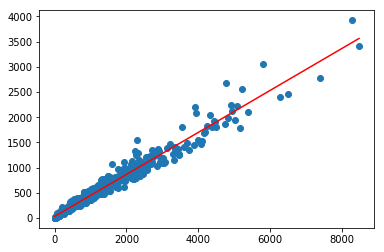

In [8]:
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=gradient*x1+intercept
plt.scatter(x,y)
plt.plot(x1,y1, 'r')
plt.show()

### Conclusiones

Si bien este trabajo demostraba una fuerte relación en los datos al principio con la gráfica de dispersión; los datos estadísticos demuestran varias inconsistencias para trabajar con ellos en mi condición actual.<br>&emsp;Por lo tanto dejaré este estudio incompleto para poder ganar mayores habilidades para su futuro análisis y perfeccionamiento.

### Bibliografía:

IIEG(2017) Información sociodemográfica por colonia, Área Metropolitana de Guadalajara, Jalisco. Recuperado el 09 de Enero de 2019 en datos.jalisco.gob.mx. Referencia: https://datos.jalisco.gob.mx/dataset/informacion-sociodemografica-por-colonia-area-metropolitana-de-guadalajara-jalisco